In [1]:
using CLOUD, Plots

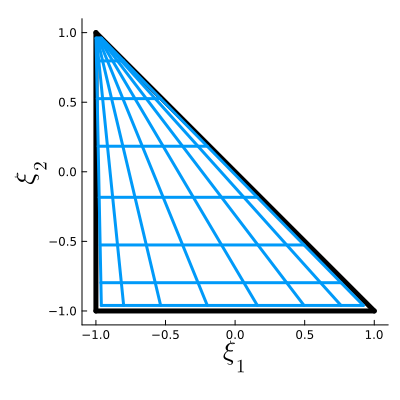

In [2]:
p=7
ref_tri_tensor = ReferenceApproximation(
    NodalTensor(p), Tri(), volume_quadrature_rule=Tuple(LGQuadrature(p) for m in 1:2),
    mapping_degree=p)
p_tri_tensor = plot(ref_tri_tensor, sketch=false, volume_quadrature=true,
    grid_connect=true, facet_quadrature=false,
    markersize=8, xlabelfontsize=18, ylabelfontsize=18,
    xlims=[-1.1,1.1],ylims=[-1.1,1.1],
    grid_line_width=3, edge_line_width=5)

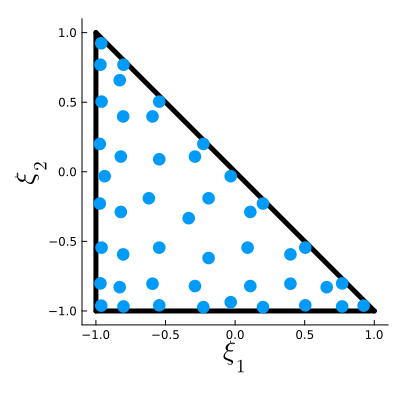

In [3]:
ref_tri_multi = ReferenceApproximation(
    NodalMulti(p), Tri(), mapping_degree=7)
p_tri_multi = plot(ref_tri_multi, sketch=false, volume_quadrature=true,
    facet_quadrature=false,
    markersize=7, xlabelfontsize=18, ylabelfontsize=18,
    xlims=[-1.1,1.1],ylims=[-1.1,1.1],
    grid_line_width=3, edge_line_width=5)

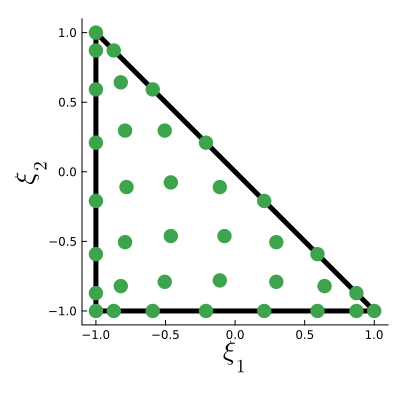

In [4]:
p_tri_map = plot(ref_tri_multi, sketch=false, volume_quadrature=false,
    facet_quadrature=false, mapping_nodes=true,
    markersize=8, xlabelfontsize=18, ylabelfontsize=18,
    xlims=[-1.1,1.1],ylims=[-1.1,1.1],
    grid_line_width=3, edge_line_width=5)

In [5]:
savefig(p_tri_tensor, "tri_tensor_nodes_LG_LG.pdf")
savefig(p_tri_multi, "tri_multi_nodes.pdf")
savefig(p_tri_map, "tri_mapping_nodes.pdf")

"/Users/tristanmontoya/Research/TensorSimplexTests/notebooks/tri_mapping_nodes.pdf"

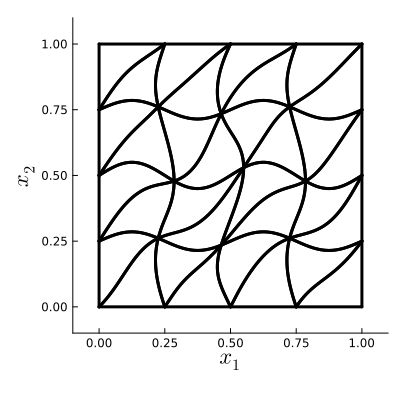

In [6]:
mesh = warp_mesh(uniform_periodic_mesh(ref_tri_multi, 
    ((0.0,1.0),(0.0,1.0)), (4,4)), ref_tri_multi, 
    ChanWarping(0.05,(1.0,1.0)))

spatial_discretization = SpatialDiscretization(mesh, ref_tri_multi)
mesh_tri = plot(spatial_discretization, volume_quadrature=false,
    facet_quadrature=false, lims=[-0.1,1.1], ylims=[-0.1,1.1])

In [7]:
savefig(mesh_tri, "tri_mesh.pdf")

"/Users/tristanmontoya/Research/TensorSimplexTests/notebooks/tri_mesh.pdf"

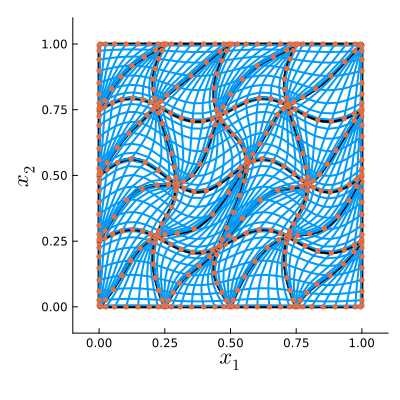

In [8]:
mesh_tensor = warp_mesh(uniform_periodic_mesh(ref_tri_tensor, 
    ((0.0,1.0),(0.0,1.0)), (4,4)), ref_tri_tensor, 
    ChanWarping(1.0/16.0,(1.0,1.0)))

spatial_discretization_tensor = SpatialDiscretization(mesh_tensor, ref_tri_tensor)

mesh_tensor = plot(spatial_discretization_tensor, 
    mapping_nodes=false,volume_quadrature=true, edge_line_width=3.0,
    facet_quadrature=true, markersize=3, grid_connect=true, lims=[-0.1,1.1], ylims=[-0.1,1.1])

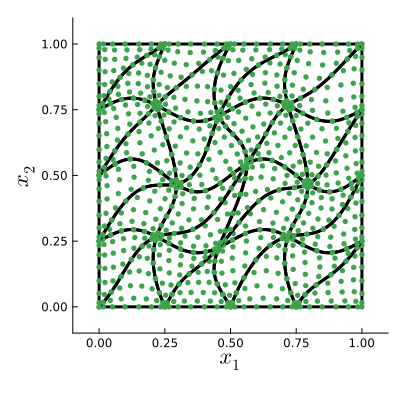

In [9]:
mesh_mapping_nodes = plot(spatial_discretization_tensor, 
    mapping_nodes=true,volume_quadrature=false, edge_line_width=3.0,
    facet_quadrature=false, markersize=3, grid_connect=false, lims=[-0.1,1.1], ylims=[-0.1,1.1])

In [10]:
savefig(mesh_tensor, "tri_mesh_tensor_nodes.pdf")
savefig(mesh_mapping_nodes, "tri_mesh_mapping_nodes.pdf")

"/Users/tristanmontoya/Research/TensorSimplexTests/notebooks/tri_mesh_mapping_nodes.pdf"